In [1]:
import os 
from dotenv import load_dotenv

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o",api_key=os.environ["OPENAI_API_KEY"])
result = llm.invoke("what is capital of india")

In [27]:
from typing_extensions import TypedDict

class State(TypedDict):
    topic : str
    charecters : str
    setting : str
    premises : str
    story_intro :str

In [28]:

def charecters(state:State):
    return {"charecters":llm.invoke(f"generate some charecters for a joke on topic {state["topic"]}").content}

def settings(state:State):
    return {"setting":llm.invoke(f"generate some settings for a joke on topic {state["topic"]}").content}

def premises(state:State):
    return {"premises":llm.invoke(f"generate some premises for a joke on topic {state["topic"]}").content}

def aggregator(state:State):
    print(f"state in aggeator is {state}")
    msg = llm.invoke(
        f"Write a short story introduction using these elements:\n"
        f"Characters: {state['charecters']}\n"
        f"Setting: {state['setting']}\n"
        f"Premise: {state['premises']}"
    )
    return {"story_intro": msg.content}

In [29]:
from langgraph.graph import StateGraph,START,END

graph_builder = StateGraph(State)

graph_builder.add_node("charecters",charecters)
graph_builder.add_node("setting",settings)
graph_builder.add_node("premises",premises),
graph_builder.add_node("aggregator",aggregator),

graph_builder.add_edge(START,"charecters")
graph_builder.add_edge(START,"setting")
graph_builder.add_edge(START,"premises")
graph_builder.add_edge("charecters","aggregator")
graph_builder.add_edge("setting","aggregator")
graph_builder.add_edge("premises","aggregator")
graph_builder.add_edge("aggregator",END)

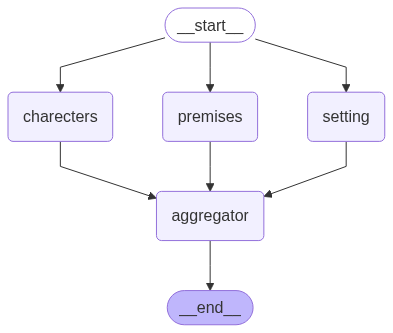

In [30]:
graph = graph_builder.compile()

from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
graph.invoke(State(topic='harrypotter'))

state in aggeator is {'topic': 'harrypotter', 'charecters': "Sure, here are a few original characters that could be used for a Harry Potter-themed joke:\n\n1. **Bertie Bottler**: A wizard with a knack for creating bizarre-flavored potions, none of which are intentional.\n\n2. **Nora Nimbus**: A broomstick-obsessed witch who tries to fly everything from kitchen chairs to tables, claiming each is a “new model.”\n\n3. **Gus Galleon**: A wizard banker constantly trying to calculate the exchange rates between Muggle money and Wizarding coinage, but is always off by a Knut or two.\n\n4. **Luna Lupin**: Remus Lupin’s long-lost cousin, who turns into a barking Chihuahua instead of a werewolf on full moons.\n\n5. **Felix Fudge**: A distant relative of Cornelius Fudge, known for his terrible luck and constant misinterpretations of prophecy.\n\n6. **Minerva Marmalade**: A witch convinced that turning jam into various animals could revolutionize the magical culinary world.\n\nUsing these character

{'topic': 'harrypotter',
 'charecters': "Sure, here are a few original characters that could be used for a Harry Potter-themed joke:\n\n1. **Bertie Bottler**: A wizard with a knack for creating bizarre-flavored potions, none of which are intentional.\n\n2. **Nora Nimbus**: A broomstick-obsessed witch who tries to fly everything from kitchen chairs to tables, claiming each is a “new model.”\n\n3. **Gus Galleon**: A wizard banker constantly trying to calculate the exchange rates between Muggle money and Wizarding coinage, but is always off by a Knut or two.\n\n4. **Luna Lupin**: Remus Lupin’s long-lost cousin, who turns into a barking Chihuahua instead of a werewolf on full moons.\n\n5. **Felix Fudge**: A distant relative of Cornelius Fudge, known for his terrible luck and constant misinterpretations of prophecy.\n\n6. **Minerva Marmalade**: A witch convinced that turning jam into various animals could revolutionize the magical culinary world.\n\nUsing these characters, you might create 